# Data Preprocessing For Loan Approval Prediction System
The **Loan Approval Prediction System** is a machine learning-based solution designed to automate and enhance the loan application evaluation process. By analyzing historical loan data, the system predicts whether a loan application is likely to be approved based on various applicant attributes. This predictive model not only improves decision-making accuracy but also reduces manual workload, enabling financial institutions to streamline operations and provide faster responses to applicants.

# Import Libraries

In [1]:
# import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# reading file path
file = Path(r"../data/loan.csv")

# reading csv file
df = pd.read_csv(file)

In [3]:
# testing dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Sanity Check

In [4]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# dataset description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# check column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# drop redundant columns
df.drop(columns='Loan_ID', axis=1, inplace=True)

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Check for Duplicates

In [8]:
# check duplicates values
df.duplicated().sum()

np.int64(0)

## Check for null values

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Drop rows with minimal null values
df.dropna(subset=["Married"], inplace=True)

In [11]:
df.isnull().sum()

Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Standardize Column Names

In [12]:
# Standardize Column Names
df.columns = df.columns.str.replace('_', '')

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm',
       'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

## Standardize Values

### Checking unique values

In [13]:
df['LoanStatus'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
# Replacing '3+' with '3' in the 'Dependents' column
df['Dependents'] = df['Dependents'].str.replace('3+', '3').astype('Int64')

df['Dependents'].unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [17]:
df['LoanAmountTerm'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

# **Exploratory Data Analysis (EDA)**

In [18]:
# figure size
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

## **Univariate Analysis**

### **countplot for unique value distribution**

In [19]:
len(df.select_dtypes(include='object').columns)

6

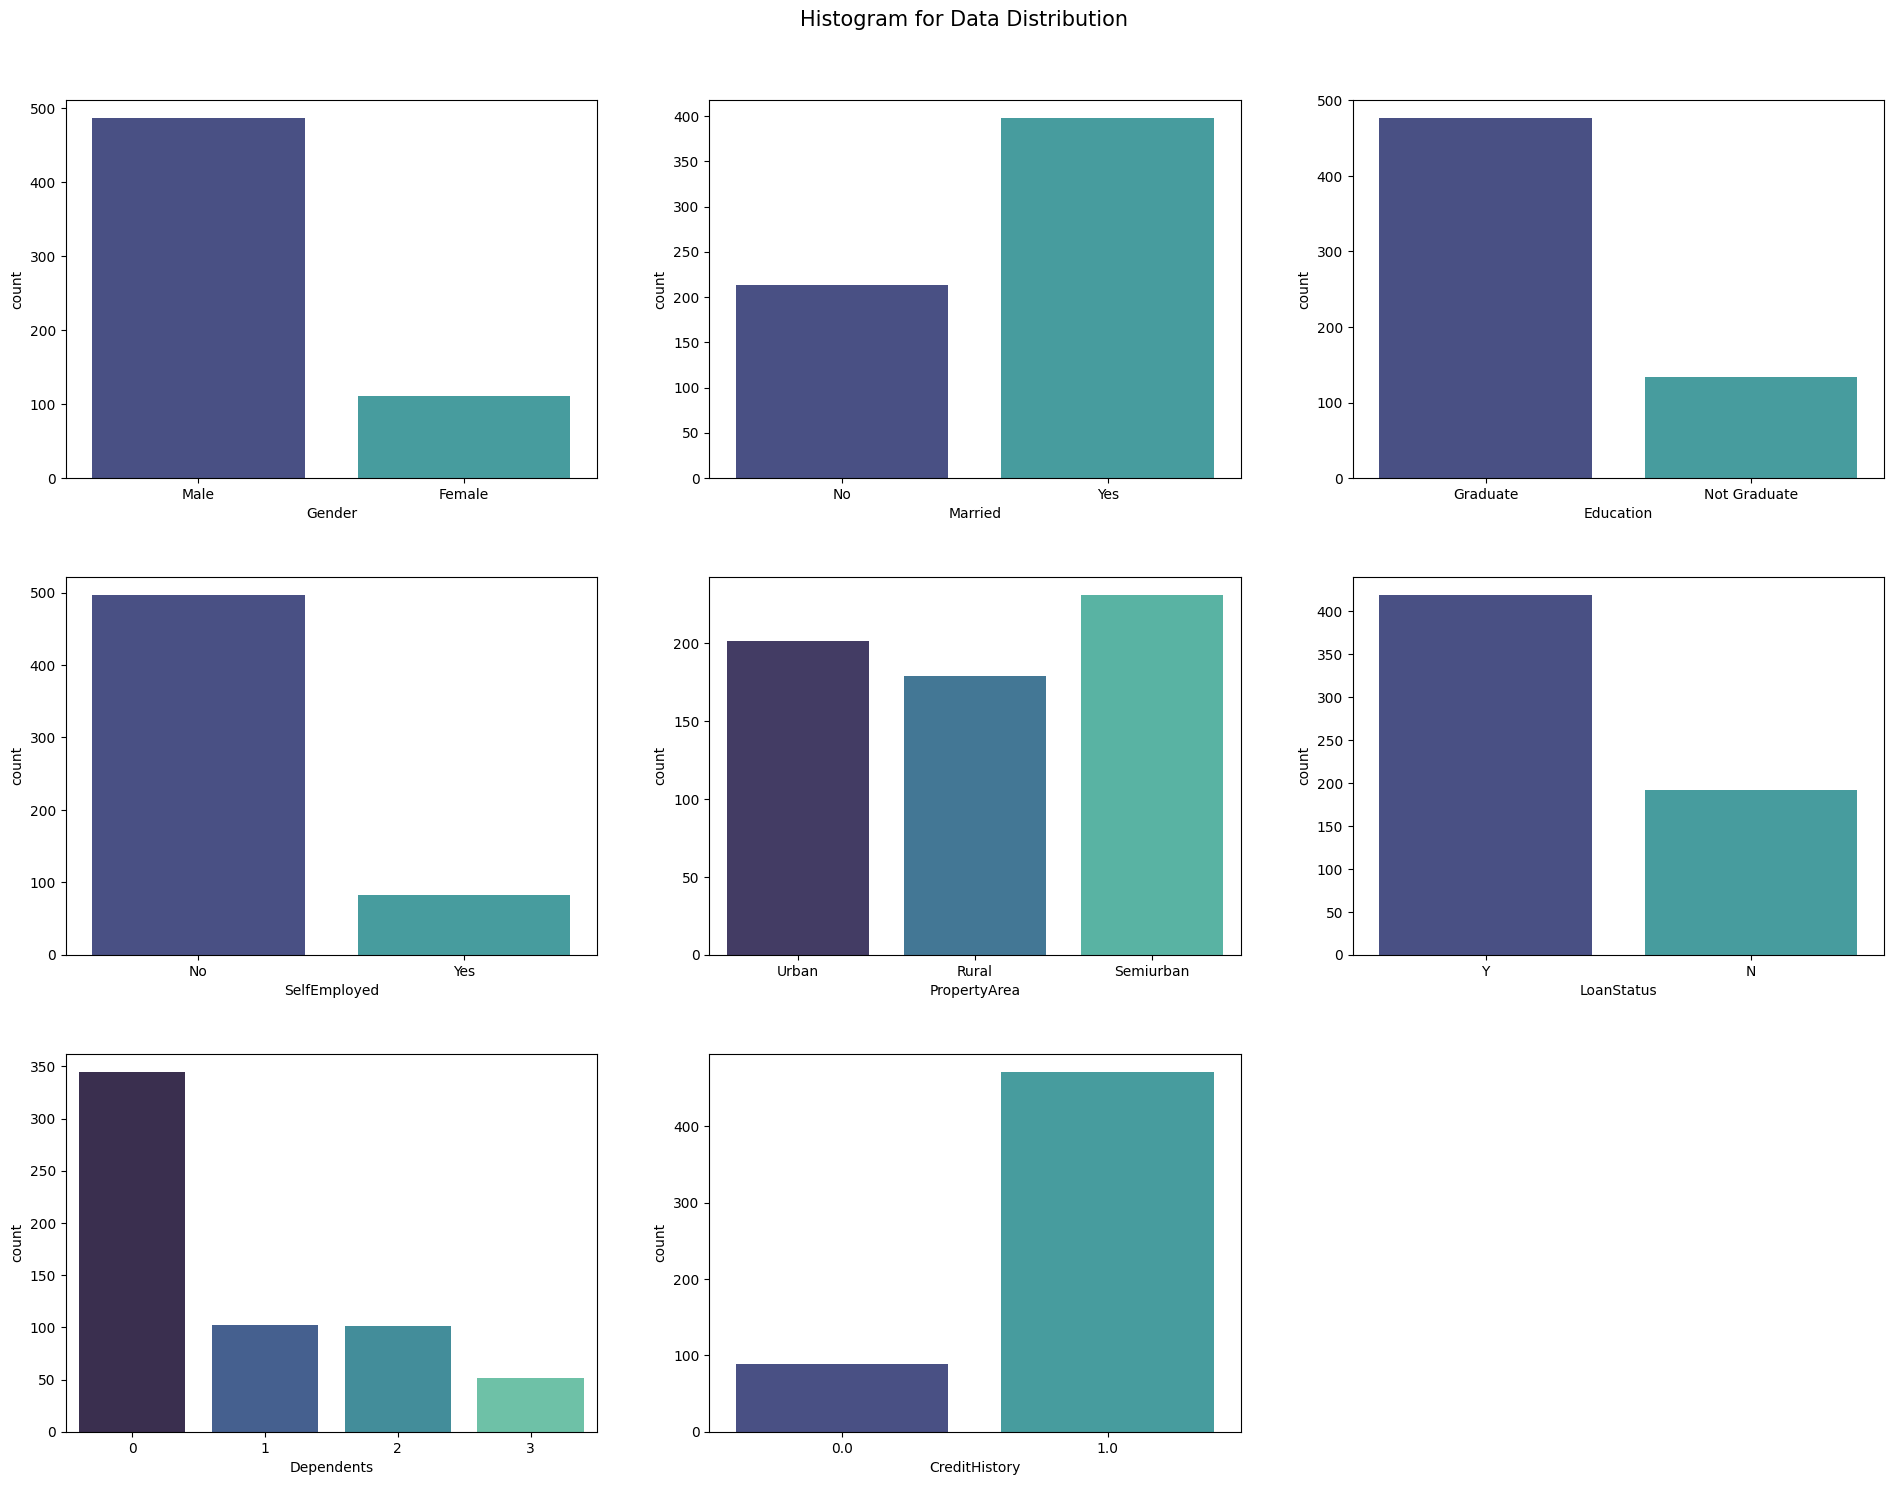

In [20]:
# columns for unique value distribution
cols_to_plot = df.select_dtypes(include="object").columns.to_list() + ['Dependents', 'CreditHistory']

# set the number of rows and columns for the grid
rows, cols = 3, 3

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(cols_to_plot):
    row_pos = i // cols
    col_pos = i % cols
    sns.countplot(data=df, x=col, ax=axes[row_pos, col_pos], palette="mako")
    plt.title(f"{col} Distribution")


# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

#### **Analysis of Countplots**

The provided countplots offer insights into the distribution of categorical variables in the dataset. Below is a detailed analysis of each countplot:

##### **1. Gender**
**Key Observation:**
- Male applicants significantly outnumber Female applicants
- Approximately 82% of applicants are Male, while only 18% are Female

**Key Takeaways:**
- Severe gender imbalance in the dataset
- Female applicants are underrepresented in loan applications
- Missing Gender data needs to be addressed

**Decision / Action:**
- Handle missing Gender values using **`KNN imputation`** or predictive imputation
- Consider using techniques like SMOTE or class weighting to address gender imbalance during modeling
- Validate if gender bias exists in loan approval decisions

##### **2. Married**
**Key Observation:**
- Majority of applicants are Married (approximately 65%)
- About 35% of applicants are Not Married

**Key Takeaways:**
- Married individuals are more likely to apply for loans
- Marriage status could be an important factor in loan approval
- Relatively balanced distribution compared to other categorical variables

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Include Married status as a feature in the model
- Analyze approval rates by marital status to understand its impact

##### **3. Education**
**Key Observation:**
- Overwhelming majority are Graduates (approximately 80%)
- Only about 20% are Not Graduate

**Key Takeaways:**
- Strong educational bias toward graduates in loan applications
- Graduates may have better income prospects and loan eligibility
- Educational qualification is likely to be a significant factor in loan approval

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Keep as binary categorical variable (Graduate vs Not Graduate)
- Analyze approval rates by education level to understand its impact

##### **4. SelfEmployed**
**Key Observation:**
- Vast majority are Not SelfEmployed (approximately 87%)
- Only about 13% are SelfEmployed

**Key Takeaways:**
- Salaried individuals dominate loan applications
- SelfEmployed applicants are underrepresented
- Missing values in this feature are substantial and need careful handling

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Consider creating a separate category for missing values if they represent a meaningful group
- Analyze if self-employment affects loan approval rates due to income stability concerns

##### **5. CreditHistory**
**Key Observation:**
- Most applicants have good credit history (CreditHistory = 1.0)
- Approximately 75% have CreditHistory = 1.0, while 25% have 0.0

**Key Takeaways:**
- Majority of applicants have good credit standing
- Credit history is likely to be one of the most important factors in loan approval
- The distribution suggests credit history is a strong predictor

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Keep as binary feature (1.0 = Good credit, 0.0 = Bad credit)
- This will likely be a very important feature in the predictive model

##### **6. PropertyArea**
**Key Observation:**
- Semiurban areas have the highest representation
- Urban and Rural areas have relatively balanced representation
- Distribution is fairly even across all three property types

**Key Takeaways:**
- Applicants from all property areas are well-represented
- Semiurban applicants are slightly more common
- Property area may reflect economic factors affecting loan approval

**Decision / Action:**
- No missing values to handle
- Use one-hot encoding for this categorical variable
- Analyze approval rates by property area to understand regional differences

### **histplot for data distribution**

In [21]:
len(df.select_dtypes(include='number').columns)

6

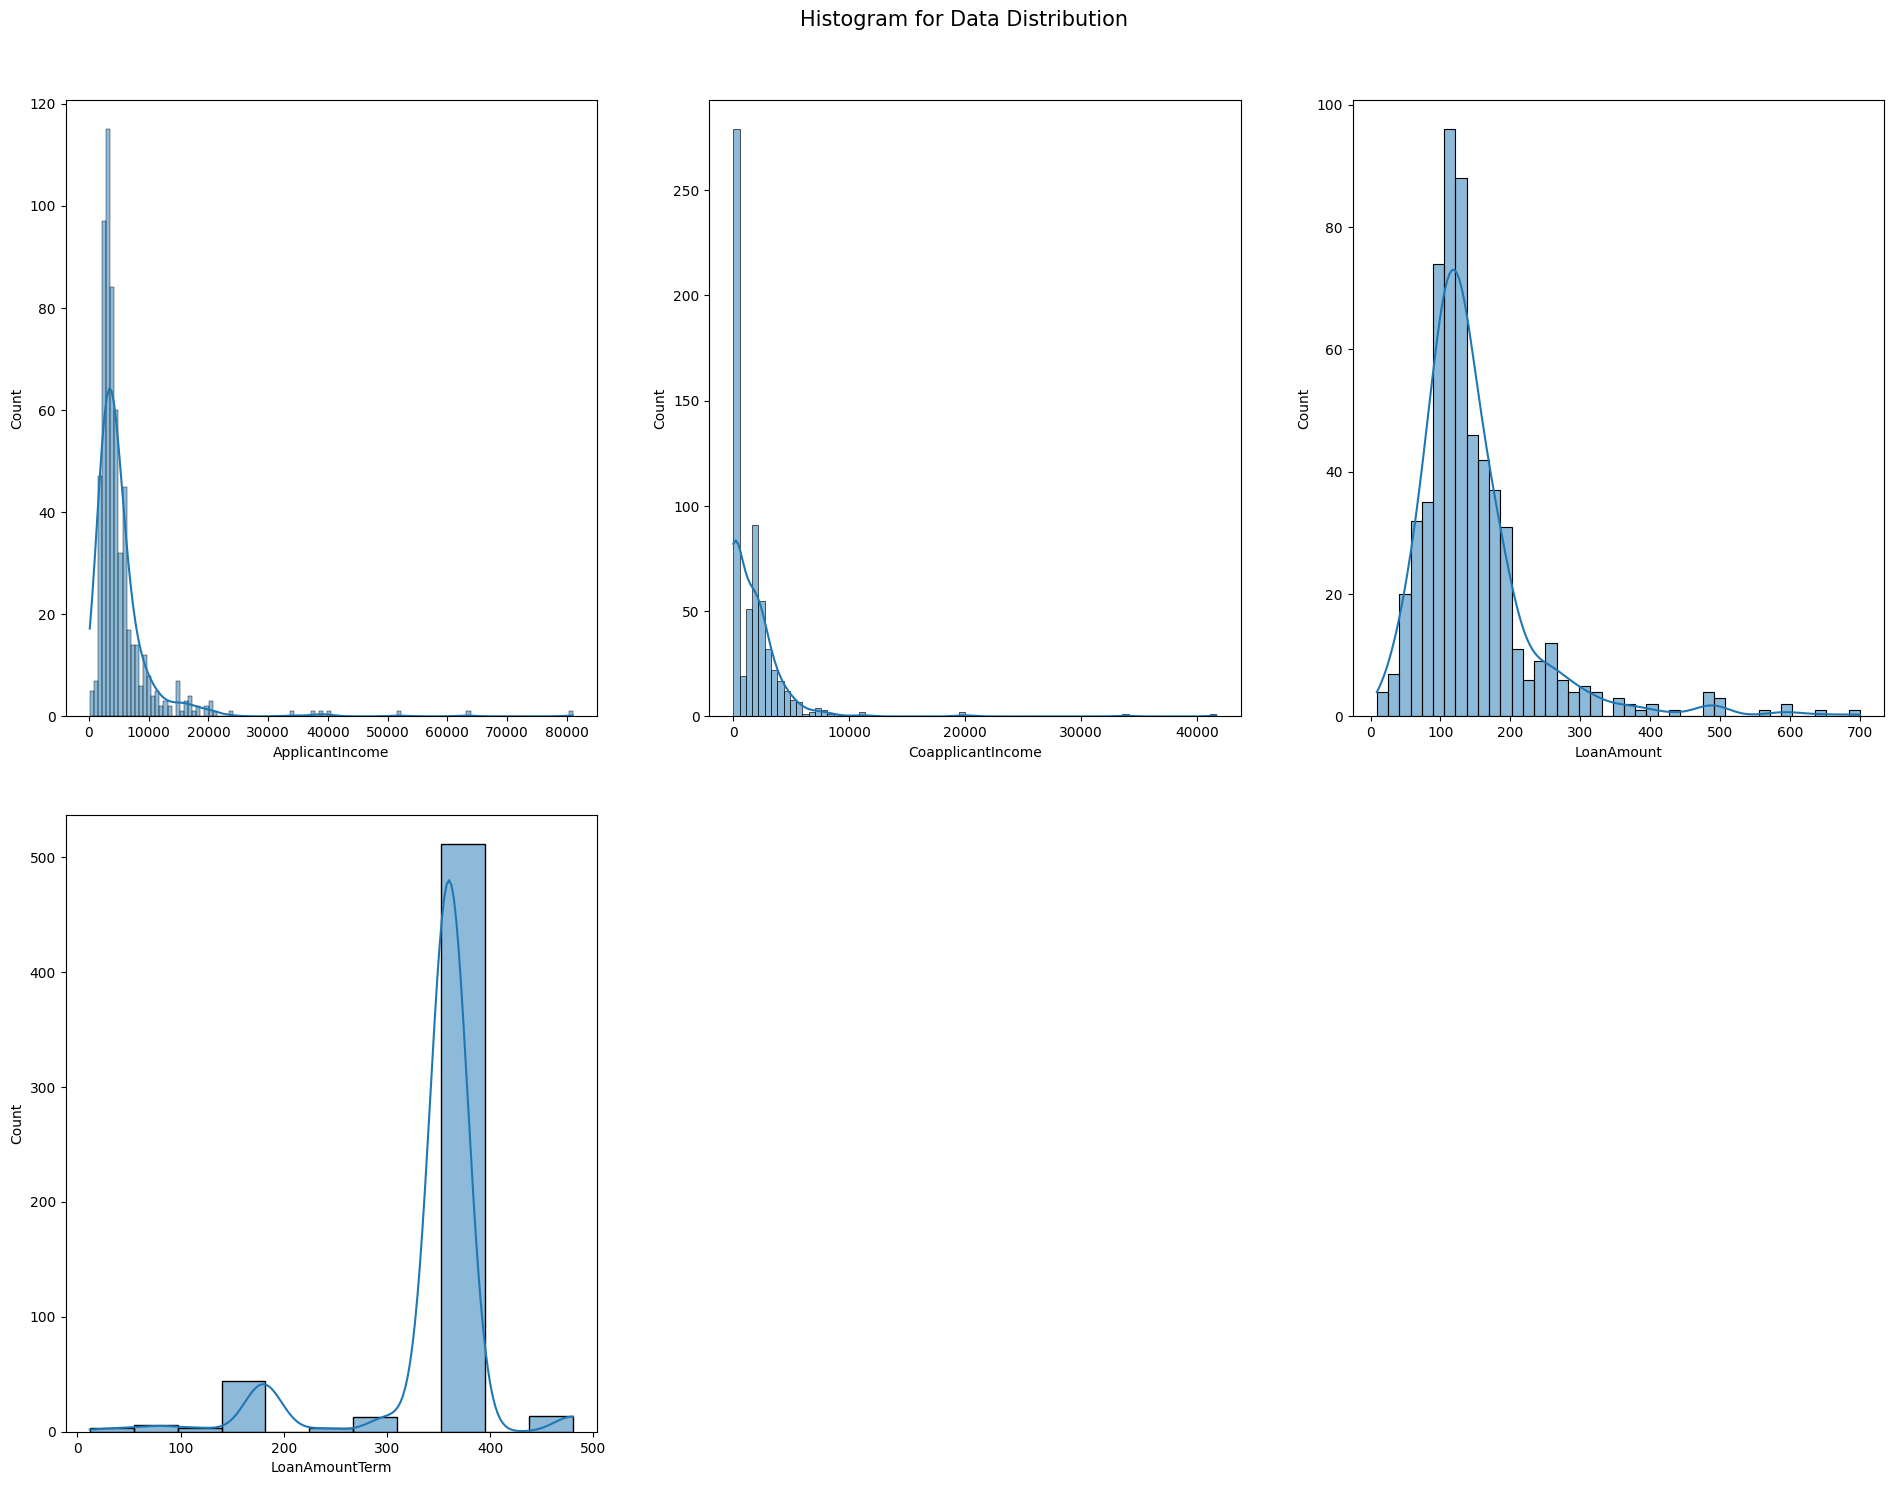

In [22]:
# exclude the binary columns
cols_to_plot = [col for col in df.select_dtypes(include="number").columns if col not in ['Dependents', 'CreditHistory']]

# set grid size dynamically
# ceil division for rows
rows = (len(cols_to_plot) + 2) // 3
cols = 3

# create subplots
# flatten to 1D for easier indexing
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# plot histograms
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, ax=axes[i], palette="mako", kde=True)

# remove unused subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.show()


**Analysis of Histogram**

##### **1. ApplicantIncome**
**Key Observation:**  
- The distribution is **right-skewed**, with most applicants having lower incomes.
- There is a peak around the lower income range (e.g., below $10,000).
- A long tail extends to higher income levels, indicating a few high-income outliers.
- Missing values: No missing values detected.

**Takeaways**:
- Income levels vary widely, but most applicants have relatively low incomes.
- The skewness suggests that a transformation (e.g., logarithmic) might be necessary to normalize the distribution.
- High-income outliers could disproportionately influence model performance if not handled properly.

**Decision / Action**:
- Apply a **logarithmic transformation** or **box-cox transformation** to reduce skewness.
- Handle outliers by either capping extreme values or using robust scaling techniques.
- Investigate whether `ApplicantIncome` correlates strongly with other features like `LoanAmount` or `LoanStatus`.


##### **2. CoapplicantIncome**
**Key Observation:**
- The distribution is also **right-skewed**, similar to `ApplicantIncome`.
- Most co-applicants have very low or zero income, indicating many applications do not involve a co-applicant.
- A smaller group has moderate to high income, but these are rare compared to those with no income.
- Missing values: No missing values detected.

**Takeaways**:
- Many applicants do not have a co-applicant or the co-applicant has no income.
- The presence of a co-applicant with income may indicate a stronger financial profile.
- Skewness and outliers need addressing to avoid bias in modeling.

**Decision / Action**:
- Apply a **logarithmic transformation** after adding a small constant to handle zeros (e.g., `np.log(CoapplicantIncome + 1)`).
- Investigate interactions between `ApplicantIncome` and `CoapplicantIncome` to understand their combined effect on loan approval.


##### **3. LoanAmount**
**Key Observation:**
- The distribution is **right-skewed**, with most loans clustered at lower amounts.
- There is a peak around the lower loan amount range (e.g., below $200,000).
- A long tail extends to higher loan amounts, indicating some large loan requests.
- Missing values: Some missing values detected.

**Takeaways**:
- Loan amounts vary significantly, but most applicants request moderate loan amounts.
- Higher loan amounts are less frequent but still present.
- Missing values in `LoanAmount` need imputation before further analysis or modeling.

**Decision / Action**:
- Apply a **logarithmic transformation** to reduce skewness.
- Impute missing values using methods like median imputation or KNN imputation based on related features.
- Investigate whether loan amount correlates with income levels, property area, or credit history.


##### **4. LoanAmountTerm**
**Key Observation:**
- The distribution shows a **bimodal pattern** with peaks at specific standard terms (e.g., 360 months and 180 months).
- Most loans have standardized terms, with fewer loans having shorter or longer terms.
- Missing values: No missing values detected.

**Takeaways**:
- Loan terms are highly structured, with most applicants opting for common durations like 30 years (360 months).
- This feature might be better treated as categorical or ordinal rather than numerical due to its discrete nature.
- Standardized terms suggest lending policies or preferences.

**Decision / Action**:
- Treat `LoanAmountTerm` as a **categorical variable** or create bins (e.g., Short, Medium, Long term).
- If kept numerical, ensure proper scaling during preprocessing.
- Investigate whether loan term length affects repayment behavior or approval rates.


##### **Summary of Missing Values**
- **Missing Values Status**:
  - `ApplicantIncome`: No missing values.
  - `CoapplicantIncome`: No missing values.
  - `LoanAmount`: Some missing values detected.
  - `LoanAmountTerm`: Some missing values detected.
  - `CreditHistory`: Moderate missing values detected.

**Action Plan for Missing Values**:
- For `LoanAmount` or **KNN imputation** to fill missing values.
- For `LoanAmountTerm`, use **mode imputation**
- For `CreditHistory`, use **KNN imputation** to fill missing values.


##### **Final Recommendations**
1. **Transformations**:
   - Apply logarithmic transformations to `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` to reduce skewness.
   - Scale `LoanAmountTerm` if kept numerical or treat it as categorical.

2. **Handling Outliers**:
   - Cap extreme values or use robust scaling for `ApplicantIncome` and `LoanAmount`.

3. **Imputation**:
   - Use median or KNN imputation for `LoanAmount`.

4. **Modeling Considerations**:
   - Address class imbalance in `CreditHistory` and `LoanStatus`.
   - Validate models using stratified sampling and appropriate metrics.